In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\tanis\Downloads\archive\train.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [2]:
x = df.drop(columns ='target')
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [3]:
y=df['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [8]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=5, learning_rate=0.1)
clf.fit(x, y)

0:	learn: 0.6494270	total: 146ms	remaining: 583ms
1:	learn: 0.6108417	total: 147ms	remaining: 221ms
2:	learn: 0.5779402	total: 148ms	remaining: 98.8ms
3:	learn: 0.5475563	total: 149ms	remaining: 37.4ms
4:	learn: 0.5226877	total: 150ms	remaining: 0us


In [9]:
clf.score(x, y)

0.8839024390243903

In [10]:
import pandas as pd
x_test =pd.read_csv(r'C:\Users\tanis\Downloads\archive\test.csv')
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
x__test = x_test.drop(columns ='target')
y_test=x_test['target']
y_test

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=5, learning_rate=0.1)
clf.fit(x__test, y_test)

0:	learn: 0.6618268	total: 1.46ms	remaining: 5.84ms
1:	learn: 0.6338728	total: 3.09ms	remaining: 4.63ms
2:	learn: 0.6078666	total: 4.52ms	remaining: 3.02ms
3:	learn: 0.5881460	total: 6.03ms	remaining: 1.51ms
4:	learn: 0.5676137	total: 7.47ms	remaining: 0us


In [13]:
clf.score(x__test, y_test)

0.8679867986798679

In [20]:
from sklearn import metrics
model=clf.fit(x__test, y_test)
y_pred=model.predict(x__test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0:	learn: 0.6618268	total: 1.27ms	remaining: 5.07ms
1:	learn: 0.6338728	total: 2.5ms	remaining: 3.75ms
2:	learn: 0.6078666	total: 4.32ms	remaining: 2.88ms
3:	learn: 0.5881460	total: 5.77ms	remaining: 1.44ms
4:	learn: 0.5676137	total: 6.76ms	remaining: 0us
Accuracy: 0.8679867986798679


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       138
           1       0.85      0.93      0.88       165

    accuracy                           0.87       303
   macro avg       0.87      0.86      0.87       303
weighted avg       0.87      0.87      0.87       303



Learning rate set to 0.006187
0:	learn: 0.6871929	total: 2.85ms	remaining: 2.85s
1:	learn: 0.6828521	total: 5.79ms	remaining: 2.89s
2:	learn: 0.6780475	total: 11ms	remaining: 3.64s
3:	learn: 0.6727876	total: 13ms	remaining: 3.24s
4:	learn: 0.6678963	total: 15.1ms	remaining: 3s
5:	learn: 0.6634720	total: 17.2ms	remaining: 2.84s
6:	learn: 0.6586708	total: 18.8ms	remaining: 2.67s
7:	learn: 0.6548173	total: 21.5ms	remaining: 2.67s
8:	learn: 0.6503190	total: 23.9ms	remaining: 2.63s
9:	learn: 0.6451540	total: 26.2ms	remaining: 2.59s
10:	learn: 0.6399704	total: 28.3ms	remaining: 2.54s
11:	learn: 0.6357680	total: 30.4ms	remaining: 2.51s
12:	learn: 0.6309457	total: 32.4ms	remaining: 2.46s
13:	learn: 0.6268384	total: 34.5ms	remaining: 2.43s
14:	learn: 0.6227568	total: 36.8ms	remaining: 2.42s
15:	learn: 0.6186179	total: 38.8ms	remaining: 2.38s
16:	learn: 0.6149468	total: 40.7ms	remaining: 2.35s
17:	learn: 0.6115627	total: 42.9ms	remaining: 2.34s
18:	learn: 0.6074381	total: 45.3ms	remaining: 2.34s

182:	learn: 0.3121146	total: 375ms	remaining: 1.67s
183:	learn: 0.3115746	total: 377ms	remaining: 1.67s
184:	learn: 0.3105960	total: 379ms	remaining: 1.67s
185:	learn: 0.3098270	total: 381ms	remaining: 1.67s
186:	learn: 0.3090832	total: 382ms	remaining: 1.66s
187:	learn: 0.3080246	total: 384ms	remaining: 1.66s
188:	learn: 0.3072299	total: 386ms	remaining: 1.66s
189:	learn: 0.3063359	total: 388ms	remaining: 1.65s
190:	learn: 0.3055943	total: 390ms	remaining: 1.65s
191:	learn: 0.3050663	total: 392ms	remaining: 1.65s
192:	learn: 0.3041033	total: 394ms	remaining: 1.65s
193:	learn: 0.3033526	total: 396ms	remaining: 1.65s
194:	learn: 0.3028493	total: 398ms	remaining: 1.65s
195:	learn: 0.3019941	total: 401ms	remaining: 1.64s
196:	learn: 0.3010663	total: 403ms	remaining: 1.64s
197:	learn: 0.3006706	total: 406ms	remaining: 1.65s
198:	learn: 0.3001660	total: 409ms	remaining: 1.65s
199:	learn: 0.2995855	total: 412ms	remaining: 1.65s
200:	learn: 0.2989391	total: 415ms	remaining: 1.65s
201:	learn: 

390:	learn: 0.2127257	total: 756ms	remaining: 1.18s
391:	learn: 0.2125646	total: 758ms	remaining: 1.18s
392:	learn: 0.2121634	total: 760ms	remaining: 1.17s
393:	learn: 0.2119425	total: 763ms	remaining: 1.17s
394:	learn: 0.2116290	total: 764ms	remaining: 1.17s
395:	learn: 0.2114214	total: 766ms	remaining: 1.17s
396:	learn: 0.2112698	total: 768ms	remaining: 1.17s
397:	learn: 0.2111522	total: 770ms	remaining: 1.17s
398:	learn: 0.2107532	total: 772ms	remaining: 1.16s
399:	learn: 0.2104263	total: 774ms	remaining: 1.16s
400:	learn: 0.2101469	total: 777ms	remaining: 1.16s
401:	learn: 0.2097744	total: 779ms	remaining: 1.16s
402:	learn: 0.2093597	total: 781ms	remaining: 1.16s
403:	learn: 0.2089912	total: 782ms	remaining: 1.15s
404:	learn: 0.2087147	total: 784ms	remaining: 1.15s
405:	learn: 0.2083037	total: 786ms	remaining: 1.15s
406:	learn: 0.2079193	total: 787ms	remaining: 1.15s
407:	learn: 0.2076494	total: 789ms	remaining: 1.14s
408:	learn: 0.2073646	total: 790ms	remaining: 1.14s
409:	learn: 

574:	learn: 0.1672478	total: 1.12s	remaining: 831ms
575:	learn: 0.1671269	total: 1.13s	remaining: 829ms
576:	learn: 0.1668413	total: 1.13s	remaining: 828ms
577:	learn: 0.1665463	total: 1.13s	remaining: 826ms
578:	learn: 0.1663987	total: 1.13s	remaining: 824ms
579:	learn: 0.1663241	total: 1.14s	remaining: 823ms
580:	learn: 0.1661071	total: 1.14s	remaining: 821ms
581:	learn: 0.1658902	total: 1.14s	remaining: 819ms
582:	learn: 0.1655697	total: 1.14s	remaining: 817ms
583:	learn: 0.1654922	total: 1.14s	remaining: 815ms
584:	learn: 0.1652851	total: 1.15s	remaining: 814ms
585:	learn: 0.1652309	total: 1.15s	remaining: 812ms
586:	learn: 0.1649407	total: 1.15s	remaining: 810ms
587:	learn: 0.1647684	total: 1.15s	remaining: 808ms
588:	learn: 0.1646284	total: 1.16s	remaining: 806ms
589:	learn: 0.1644609	total: 1.16s	remaining: 805ms
590:	learn: 0.1642256	total: 1.16s	remaining: 804ms
591:	learn: 0.1640079	total: 1.16s	remaining: 802ms
592:	learn: 0.1639113	total: 1.17s	remaining: 800ms
593:	learn: 

760:	learn: 0.1351553	total: 1.5s	remaining: 471ms
761:	learn: 0.1350119	total: 1.5s	remaining: 470ms
762:	learn: 0.1349653	total: 1.5s	remaining: 468ms
763:	learn: 0.1349249	total: 1.51s	remaining: 466ms
764:	learn: 0.1347673	total: 1.51s	remaining: 464ms
765:	learn: 0.1346741	total: 1.51s	remaining: 462ms
766:	learn: 0.1344415	total: 1.51s	remaining: 460ms
767:	learn: 0.1342535	total: 1.51s	remaining: 458ms
768:	learn: 0.1341502	total: 1.52s	remaining: 456ms
769:	learn: 0.1340125	total: 1.52s	remaining: 454ms
770:	learn: 0.1338518	total: 1.52s	remaining: 452ms
771:	learn: 0.1336786	total: 1.52s	remaining: 450ms
772:	learn: 0.1335287	total: 1.52s	remaining: 448ms
773:	learn: 0.1334164	total: 1.53s	remaining: 446ms
774:	learn: 0.1332931	total: 1.53s	remaining: 444ms
775:	learn: 0.1331211	total: 1.53s	remaining: 442ms
776:	learn: 0.1330353	total: 1.53s	remaining: 440ms
777:	learn: 0.1327833	total: 1.53s	remaining: 438ms
778:	learn: 0.1325832	total: 1.54s	remaining: 436ms
779:	learn: 0.1

963:	learn: 0.1083608	total: 1.88s	remaining: 70.3ms
964:	learn: 0.1082656	total: 1.88s	remaining: 68.4ms
965:	learn: 0.1081875	total: 1.89s	remaining: 66.4ms
966:	learn: 0.1081058	total: 1.89s	remaining: 64.5ms
967:	learn: 0.1079593	total: 1.89s	remaining: 62.5ms
968:	learn: 0.1078344	total: 1.89s	remaining: 60.6ms
969:	learn: 0.1076678	total: 1.9s	remaining: 58.6ms
970:	learn: 0.1074995	total: 1.9s	remaining: 56.7ms
971:	learn: 0.1074461	total: 1.9s	remaining: 54.7ms
972:	learn: 0.1072900	total: 1.9s	remaining: 52.8ms
973:	learn: 0.1072282	total: 1.91s	remaining: 50.9ms
974:	learn: 0.1070293	total: 1.91s	remaining: 49ms
975:	learn: 0.1069435	total: 1.91s	remaining: 47ms
976:	learn: 0.1067264	total: 1.92s	remaining: 45.1ms
977:	learn: 0.1066864	total: 1.92s	remaining: 43.1ms
978:	learn: 0.1066374	total: 1.92s	remaining: 41.2ms
979:	learn: 0.1065066	total: 1.92s	remaining: 39.2ms
980:	learn: 0.1063589	total: 1.92s	remaining: 37.3ms
981:	learn: 0.1062837	total: 1.93s	remaining: 35.3ms
9

<AxesSubplot:>

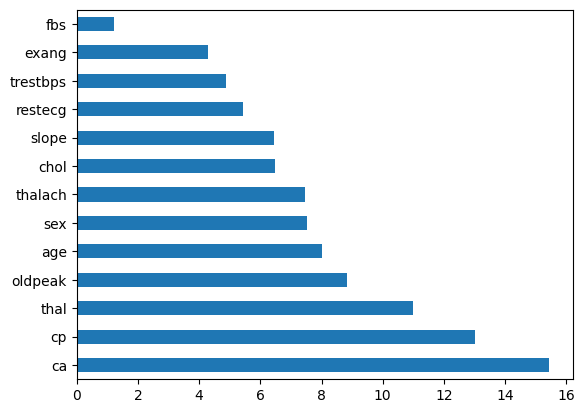

In [27]:
import pandas as pd 
from catboost import CatBoostClassifier
%matplotlib inline            
X = pd.read_csv(r'C:\Users\tanis\Downloads\archive\test.csv')
X = X[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].dropna()
Y = X.pop('target')

model = CatBoostClassifier()
model.fit(X, Y)
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(14)
   .plot(kind='barh'))

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
model = CatBoostClassifier()
parameters= { 'depth'         : sp_randInt(4,10),
              'learning_rate' : sp_randFloat(),
              'iterations'    : sp_randInt(10,100)
            }
rand = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=2, n_iter=10)
rand.fit(x__test, y_test)
print("best estimator:", rand.best_estimator_)
print("best score:", rand.best_score_)

0:	learn: 0.6642166	total: 951us	remaining: 52.3ms
1:	learn: 0.6440780	total: 2.13ms	remaining: 57.5ms
2:	learn: 0.6230134	total: 2.87ms	remaining: 50.7ms
3:	learn: 0.6034100	total: 3.53ms	remaining: 45.9ms
4:	learn: 0.5853430	total: 4.16ms	remaining: 42.4ms
5:	learn: 0.5715223	total: 4.83ms	remaining: 40.3ms
6:	learn: 0.5564511	total: 5.51ms	remaining: 38.6ms
7:	learn: 0.5429648	total: 6.28ms	remaining: 37.7ms
8:	learn: 0.5279358	total: 7ms	remaining: 36.6ms
9:	learn: 0.5193321	total: 7.62ms	remaining: 35ms
10:	learn: 0.5071031	total: 8.27ms	remaining: 33.9ms
11:	learn: 0.4968560	total: 8.88ms	remaining: 32.6ms
12:	learn: 0.4866411	total: 9.71ms	remaining: 32.1ms
13:	learn: 0.4769816	total: 10.9ms	remaining: 32.6ms
14:	learn: 0.4687222	total: 11.6ms	remaining: 31.7ms
15:	learn: 0.4594499	total: 12.3ms	remaining: 30.7ms
16:	learn: 0.4539855	total: 12.9ms	remaining: 29.6ms
17:	learn: 0.4451161	total: 13.6ms	remaining: 28.6ms
18:	learn: 0.4388574	total: 14.2ms	remaining: 27.7ms
19:	learn

0:	learn: 0.4388156	total: 539us	remaining: 29.6ms
1:	learn: 0.3826889	total: 4.02ms	remaining: 109ms
2:	learn: 0.3218549	total: 4.8ms	remaining: 84.8ms
3:	learn: 0.2730909	total: 8.37ms	remaining: 109ms
4:	learn: 0.2507289	total: 12.4ms	remaining: 127ms
5:	learn: 0.2223084	total: 15.8ms	remaining: 131ms
6:	learn: 0.1977780	total: 19.2ms	remaining: 134ms
7:	learn: 0.1806298	total: 22ms	remaining: 132ms
8:	learn: 0.1603484	total: 24.9ms	remaining: 130ms
9:	learn: 0.1472466	total: 28.6ms	remaining: 132ms
10:	learn: 0.1335041	total: 31.6ms	remaining: 129ms
11:	learn: 0.1227626	total: 35ms	remaining: 128ms
12:	learn: 0.1143023	total: 37.8ms	remaining: 125ms
13:	learn: 0.1059554	total: 41.5ms	remaining: 124ms
14:	learn: 0.1003678	total: 44.2ms	remaining: 121ms
15:	learn: 0.0952191	total: 47.4ms	remaining: 118ms
16:	learn: 0.0887087	total: 50.2ms	remaining: 115ms
17:	learn: 0.0812462	total: 53.3ms	remaining: 113ms
18:	learn: 0.0766431	total: 56.2ms	remaining: 110ms
19:	learn: 0.0728531	total

0:	learn: 0.5032352	total: 736us	remaining: 59.7ms
1:	learn: 0.4273709	total: 2.58ms	remaining: 103ms
2:	learn: 0.3883618	total: 3.96ms	remaining: 104ms
3:	learn: 0.3524058	total: 5ms	remaining: 97.5ms
4:	learn: 0.3118735	total: 5.91ms	remaining: 91ms
5:	learn: 0.2899952	total: 6.5ms	remaining: 82.4ms
6:	learn: 0.2638849	total: 7.33ms	remaining: 78.5ms
7:	learn: 0.2490424	total: 8.06ms	remaining: 74.6ms
8:	learn: 0.2364370	total: 9.73ms	remaining: 78.9ms
9:	learn: 0.2259949	total: 10.7ms	remaining: 77.3ms
10:	learn: 0.2180286	total: 11.5ms	remaining: 74.5ms
11:	learn: 0.2040074	total: 12.4ms	remaining: 72ms
12:	learn: 0.1915828	total: 13.2ms	remaining: 69.9ms
13:	learn: 0.1793945	total: 14.6ms	remaining: 71ms
14:	learn: 0.1664545	total: 15.2ms	remaining: 68.1ms
15:	learn: 0.1591176	total: 15.9ms	remaining: 65.6ms
16:	learn: 0.1541233	total: 16.5ms	remaining: 63.2ms
17:	learn: 0.1466398	total: 17.2ms	remaining: 61.2ms
18:	learn: 0.1416271	total: 17.9ms	remaining: 59.3ms
19:	learn: 0.137

0:	learn: 0.4573339	total: 535us	remaining: 40.7ms
1:	learn: 0.3724018	total: 1.92ms	remaining: 72.1ms
2:	learn: 0.3326423	total: 3.32ms	remaining: 81.9ms
3:	learn: 0.3065145	total: 4.41ms	remaining: 80.5ms
4:	learn: 0.2557506	total: 5.48ms	remaining: 78.9ms
5:	learn: 0.2317612	total: 6.32ms	remaining: 74.8ms
6:	learn: 0.2226112	total: 6.94ms	remaining: 69.4ms
7:	learn: 0.2030663	total: 7.52ms	remaining: 64.8ms
8:	learn: 0.1889919	total: 8.18ms	remaining: 61.8ms
9:	learn: 0.1717273	total: 8.78ms	remaining: 58.8ms
10:	learn: 0.1573664	total: 9.39ms	remaining: 56.4ms
11:	learn: 0.1493198	total: 10ms	remaining: 54.4ms
12:	learn: 0.1419595	total: 10.8ms	remaining: 53ms
13:	learn: 0.1296399	total: 11.4ms	remaining: 51.1ms
14:	learn: 0.1231032	total: 12ms	remaining: 49.5ms
15:	learn: 0.1171668	total: 12.5ms	remaining: 47.8ms
16:	learn: 0.1132900	total: 13.1ms	remaining: 46.1ms
17:	learn: 0.1057724	total: 13.7ms	remaining: 44.8ms
18:	learn: 0.1000491	total: 14.3ms	remaining: 43.5ms
19:	learn:

0:	learn: 0.6219292	total: 968us	remaining: 81.4ms
1:	learn: 0.5778191	total: 2.05ms	remaining: 85.1ms
2:	learn: 0.5449771	total: 2.78ms	remaining: 75.9ms
3:	learn: 0.5092649	total: 3.61ms	remaining: 73.1ms
4:	learn: 0.4780973	total: 4.39ms	remaining: 70.3ms
5:	learn: 0.4540232	total: 5.22ms	remaining: 68.7ms
6:	learn: 0.4324313	total: 6.31ms	remaining: 70.3ms
7:	learn: 0.4136854	total: 7.87ms	remaining: 75.8ms
8:	learn: 0.4000885	total: 9.04ms	remaining: 76.4ms
9:	learn: 0.3856673	total: 9.95ms	remaining: 74.6ms
10:	learn: 0.3712573	total: 10.7ms	remaining: 72.3ms
11:	learn: 0.3592878	total: 11.5ms	remaining: 70ms
12:	learn: 0.3470780	total: 12.3ms	remaining: 68.3ms
13:	learn: 0.3371314	total: 13.1ms	remaining: 66.6ms
14:	learn: 0.3243814	total: 13.9ms	remaining: 64.8ms
15:	learn: 0.3123842	total: 14.6ms	remaining: 63ms
16:	learn: 0.3013897	total: 15.4ms	remaining: 61.5ms
17:	learn: 0.2931580	total: 16.1ms	remaining: 59.9ms
18:	learn: 0.2841596	total: 16.8ms	remaining: 58.4ms
19:	lear

7:	learn: 0.2605077	total: 29.8ms	remaining: 302ms
8:	learn: 0.2384920	total: 33.3ms	remaining: 296ms
9:	learn: 0.2212741	total: 37.8ms	remaining: 298ms
10:	learn: 0.2048048	total: 41.4ms	remaining: 293ms
11:	learn: 0.1867960	total: 45.2ms	remaining: 290ms
12:	learn: 0.1685607	total: 48.7ms	remaining: 285ms
13:	learn: 0.1589074	total: 53.3ms	remaining: 285ms
14:	learn: 0.1497018	total: 57.8ms	remaining: 285ms
15:	learn: 0.1408454	total: 61.1ms	remaining: 279ms
16:	learn: 0.1330761	total: 64ms	remaining: 271ms
17:	learn: 0.1264904	total: 67.3ms	remaining: 265ms
18:	learn: 0.1202203	total: 71.9ms	remaining: 265ms
19:	learn: 0.1143248	total: 75.4ms	remaining: 260ms
20:	learn: 0.1080335	total: 78.3ms	remaining: 253ms
21:	learn: 0.1034692	total: 81.1ms	remaining: 247ms
22:	learn: 0.0978798	total: 86.2ms	remaining: 247ms
23:	learn: 0.0942258	total: 89.5ms	remaining: 243ms
24:	learn: 0.0907682	total: 92.7ms	remaining: 237ms
25:	learn: 0.0874245	total: 95.9ms	remaining: 232ms
26:	learn: 0.0843

In [48]:
import logging
automl_settings = {
    "iteration_timeout_minutes" : 10,
    "iterations" : 30,
    "primary_metric" : 'spearman_correlation',
    "preprocess" : True,
    "verbosity" : logging.INFO,
    "n_cross_validations": 5
}

from azureml.train.automl import AutoMLConfig

# local compute
automated_ml_config = AutoMLConfig(task = 'regression',
                             debug_log = 'automated_ml_errors.log',
                             X = x.values,
                             y = y.values.flatten(),
                             **automl_settings)

In [125]:
data = pd.read_csv(r'C:\Users\tanis\Downloads\archive\train.csv')
data.shape


(1025, 14)

In [126]:
data = data.sample(frac=0.95, random_state=786)
data_unseen = data.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=False, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (974, 14)
Unseen Data For Predictions: (0, 14)


In [106]:
from pycaret.classification import *
s = setup(data = data, target = 'target', session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(458, 14)"
4,Transformed data shape,"(458, 14)"
5,Transformed train set shape,"(320, 14)"
6,Transformed test set shape,"(138, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [76]:
clf = setup(data=data, target='target', n_jobs=1)
best_specific = compare_models(include = ['lr','knn','nb','lda','svm','rf'], fold = 5, n_select = 5)

,Description,Value
0,Session id,4171
1,Target,target
2,Target type,Binary
3,Original data shape,"(835, 14)"
4,Transformed data shape,"(835, 14)"
5,Transformed train set shape,"(584, 14)"
6,Transformed test set shape,"(251, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9572,0.9938,0.9668,0.9512,0.9589,0.9142,0.9145,0.3840
lda,Linear Discriminant Analysis,0.8442,0.9106,0.9073,0.8136,0.8576,0.6867,0.6925,0.0500
lr,Logistic Regression,0.8407,0.9095,0.8874,0.8206,0.8520,0.6802,0.6840,0.1760
nb,Naive Bayes,0.8169,0.8994,0.8513,0.8079,0.8266,0.6328,0.6379,0.0560
knn,K Neighbors Classifier,0.7106,0.8013,0.7218,0.7207,0.7196,0.4206,0.4226,0.0540
svm,SVM - Linear Kernel,0.6079,0.0000,0.2805,0.9147,0.4090,0.2325,0.3269,0.0400


In [77]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [78]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9661,0.9661,0.9667,0.9667,0.9667,0.9322,0.9322
1,0.9831,0.9828,1.0000,0.9677,0.9836,0.9661,0.9666
2,0.9831,0.9821,1.0000,0.9688,0.9841,0.9660,0.9665
3,0.9661,0.9677,0.9355,1.0000,0.9667,0.9323,0.9344
4,0.9655,0.9655,0.9667,0.9667,0.9667,0.9310,0.9310
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9828,0.9821,1.0000,0.9677,0.9836,0.9654,0.9660
7,0.9655,0.9667,0.9333,1.0000,0.9655,0.9311,0.9333
8,0.9310,0.9298,0.9667,0.9062,0.9355,0.8616,0.8636


In [79]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6271,0.7609,0.6000,0.6429,0.6207,0.2549,0.2555
1,0.6102,0.7414,0.6667,0.6061,0.6349,0.2188,0.2199
2,0.6780,0.7834,0.7419,0.6765,0.7077,0.3509,0.3528
3,0.6949,0.7535,0.8065,0.6757,0.7353,0.3818,0.3902
4,0.7414,0.7863,0.8000,0.7273,0.7619,0.4803,0.4829
5,0.7241,0.8589,0.7333,0.7333,0.7333,0.4476,0.4476
6,0.7586,0.8381,0.7000,0.8077,0.7500,0.5190,0.5239
7,0.7241,0.7982,0.7000,0.7500,0.7241,0.4489,0.4500
8,0.6724,0.7833,0.6667,0.6897,0.6780,0.3448,0.3450


In [80]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9831,0.9897,0.9667,1.0000,0.9831,0.9661,0.9667
1,0.8983,0.9638,0.9333,0.8750,0.9032,0.7963,0.7982
2,0.9492,0.9988,1.0000,0.9118,0.9538,0.8975,0.9023
3,0.9831,0.9931,0.9677,1.0000,0.9836,0.9661,0.9666
4,0.9828,0.9994,1.0000,0.9677,0.9836,0.9654,0.9660
5,0.9655,0.9958,1.0000,0.9375,0.9677,0.9308,0.9330
6,0.9828,0.9929,1.0000,0.9677,0.9836,0.9654,0.9660
7,0.9828,0.9988,0.9667,1.0000,0.9831,0.9655,0.9661
8,0.9828,0.9988,1.0000,0.9677,0.9836,0.9654,0.9660


In [81]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8475,0.9276,0.7667,0.9200,0.8364,0.6957,0.7059
1,0.8644,0.9322,0.8333,0.8929,0.8621,0.7290,0.7307
2,0.8814,0.9827,0.8065,0.9615,0.8772,0.7641,0.7752
3,0.8983,0.9660,0.8710,0.9310,0.9000,0.7968,0.7986
4,0.8793,0.9708,0.9000,0.8710,0.8852,0.7580,0.7585
5,0.9483,0.9708,1.0000,0.9091,0.9524,0.8961,0.9009
6,0.8793,0.9720,0.8667,0.8966,0.8814,0.7586,0.7591
7,0.9138,0.9071,0.8333,1.0000,0.9091,0.8284,0.8409
8,0.8621,0.9196,0.9000,0.8438,0.8710,0.7232,0.7249


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [82]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6949,0.7851,0.7333,0.6875,0.7097,0.3890,0.3899
1,0.7458,0.7638,0.7667,0.7419,0.7541,0.4911,0.4914
2,0.7458,0.8226,0.7742,0.7500,0.7619,0.4893,0.4896
3,0.6949,0.7897,0.8387,0.6667,0.7429,0.3797,0.3950
4,0.7586,0.8024,0.8333,0.7353,0.7812,0.5144,0.5194
5,0.8103,0.8554,0.8333,0.8065,0.8197,0.6198,0.6202
6,0.7414,0.8315,0.7000,0.7778,0.7368,0.4840,0.4866
7,0.7414,0.7738,0.6667,0.8000,0.7273,0.4852,0.4925
8,0.7931,0.8435,0.8000,0.8000,0.8000,0.5857,0.5857


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [83]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8983,0.9667,0.9000,0.9000,0.9000,0.7966,0.7966
1,0.8475,0.9092,0.9333,0.8000,0.8615,0.6939,0.7042
2,0.8814,0.9712,0.9355,0.8529,0.8923,0.7609,0.7649
3,0.9153,0.9700,0.9677,0.8824,0.9231,0.8292,0.8336
4,0.8966,0.9679,0.9667,0.8529,0.9062,0.7919,0.7996
5,0.9138,0.9667,1.0000,0.8571,0.9231,0.8263,0.8391
6,0.9483,0.9786,1.0000,0.9091,0.9524,0.8961,0.9009
7,0.8966,0.9905,0.8333,0.9615,0.8929,0.7938,0.8014
8,0.8621,0.9560,0.9667,0.8056,0.8788,0.7218,0.7381


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [96]:
plot_model(tuned_knn, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [97]:
evaluate_model(tuned_knn)
predict_model(tuned_knn);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7131,0.7711,0.7538,0.7101,0.7313,0.4242,0.4251


In [98]:
final_knn = finalize_model(tuned_knn)
print(final_knn)
predict_model(final_knn);

Pipeline(memory=FastMemory(location=C:\Users\tanis\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'cp', 'trestbps',
                                             'chol', 'fbs', 'restecg',
                                             'thalach', 'exang', 'oldpeak',
                                             'slope', 'ca', 'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='me...
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transfo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7410,0.8526,0.8077,0.7241,0.7636,0.4792,0.4827


In [99]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.